In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("global_Power_plant_database.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


### Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Model Building

### 6. Hyperparameter tuning



In [14]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [15]:
data.shape

(908, 25)

In [16]:
# drop column with NaN value
columns_to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh', 'owner', 'generation_data_source','year_of_capacity_data']
data = data.drop(columns=columns_to_drop)

In [17]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [18]:
data = data.dropna(subset=['latitude', 'longitude'])

In [19]:
data['commissioning_year'] = data['commissioning_year'].fillna(
    data['commissioning_year'].median())

In [20]:
generation_columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 
                      'generation_gwh_2016', 'generation_gwh_2017']
data[generation_columns] = data[generation_columns].fillna(
    data[generation_columns].median())

In [21]:
data.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [22]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,334.911962,21.196189,77.447848,1998.146172,1490.498257,1576.290791,1571.008630,1610.495374,1709.188665
std,591.757208,6.248627,4.907260,12.914693,2633.303642,2846.126880,3050.431199,3074.473595,3115.649204
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.771575,74.258975,1998.000000,828.073500,832.884650,741.862050,739.155400,829.611100
50%,61.200000,21.778300,76.719250,2000.000000,828.073500,832.884650,741.862050,739.155400,829.611100
75%,417.502500,25.516375,79.441475,2003.000000,828.073500,832.884650,741.862050,739.155400,829.611100
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


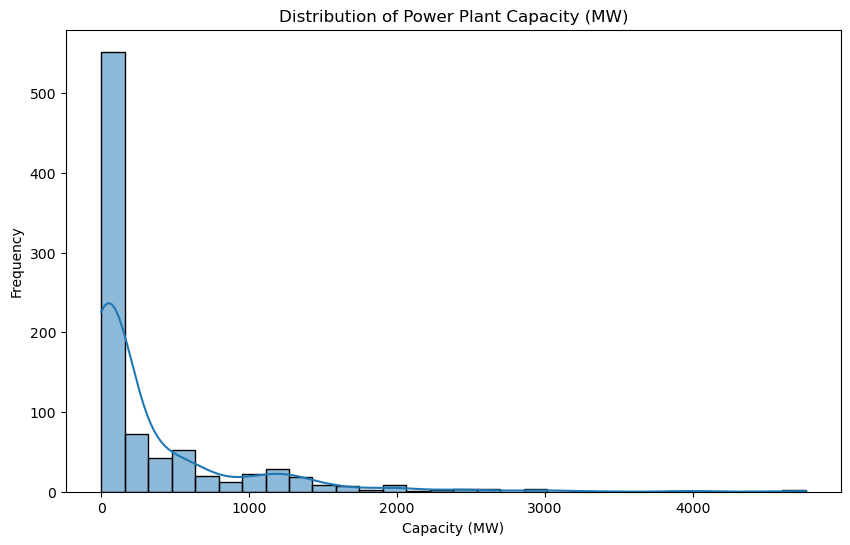

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['capacity_mw'], bins=30, kde=True)
plt.title('Distribution of Power Plant Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

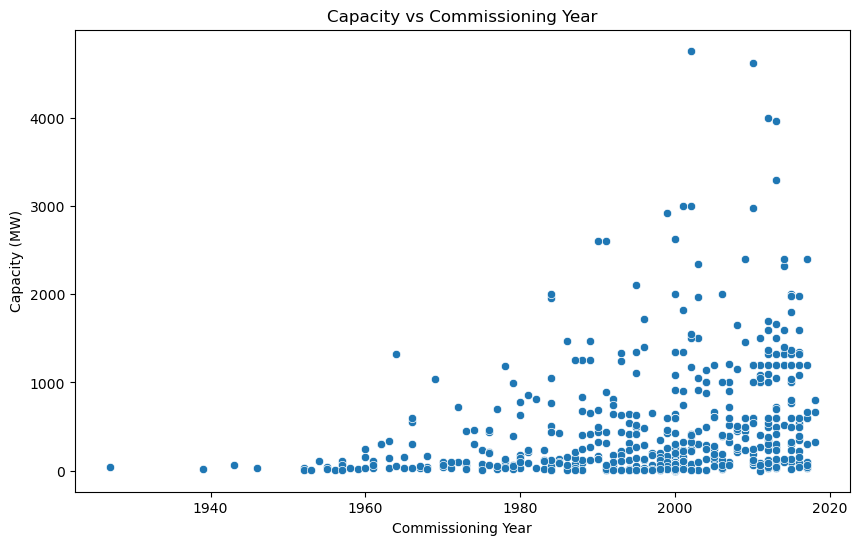

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='commissioning_year', y='capacity_mw', data=data)
plt.title('Capacity vs Commissioning Year')
plt.xlabel('Commissioning Year')
plt.ylabel('Capacity (MW)')
plt.show()


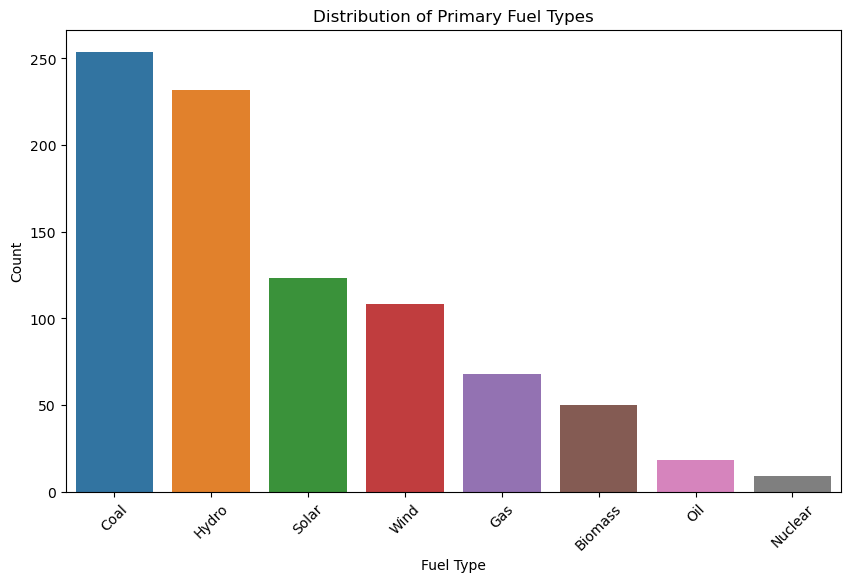

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=data, order=data['primary_fuel'].value_counts().index)
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Dropping irrelevant columns
data = data.drop(columns=['name', 'gppd_idnr', 'url'])

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Label encoding for primary_fuel (target variable for classification)
le_primary_fuel = LabelEncoder()
data['primary_fuel_encoded'] = le_primary_fuel.fit_transform(data['primary_fuel'])

# Dropping the original 'primary_fuel' column since it's now encoded
data = data.drop(columns=['primary_fuel'])


In [31]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['country', 'country_long', 'source'], drop_first=True)

In [32]:
data.dtypes

capacity_mw                                                           float64
latitude                                                              float64
longitude                                                             float64
commissioning_year                                                    float64
geolocation_source                                                     object
                                                                       ...   
source_Welspun Solar Punjab Private Limited                              bool
source_West Bengal Energy Development Corporation Limited (WBEDCL)       bool
source_West Coast Paper Mills Ltd.                                       bool
source_Yashwantrao Krishna ssk                                           bool
source_Ym Ssk ltd                                                        bool
Length: 201, dtype: object

In [33]:
data = data.drop(columns=['geolocation_source'])

In [34]:
data.dtypes

capacity_mw                                                           float64
latitude                                                              float64
longitude                                                             float64
commissioning_year                                                    float64
generation_gwh_2013                                                   float64
                                                                       ...   
source_Welspun Solar Punjab Private Limited                              bool
source_West Bengal Energy Development Corporation Limited (WBEDCL)       bool
source_West Coast Paper Mills Ltd.                                       bool
source_Yashwantrao Krishna ssk                                           bool
source_Ym Ssk ltd                                                        bool
Length: 200, dtype: object

In [35]:
# Convert boolean columns to integers (0/1)
data = data.astype({col: 'int' for col in data.select_dtypes('bool').columns})


In [36]:
data.dtypes

capacity_mw                                                           float64
latitude                                                              float64
longitude                                                             float64
commissioning_year                                                    float64
generation_gwh_2013                                                   float64
                                                                       ...   
source_Welspun Solar Punjab Private Limited                             int32
source_West Bengal Energy Development Corporation Limited (WBEDCL)      int32
source_West Coast Paper Mills Ltd.                                      int32
source_Yashwantrao Krishna ssk                                          int32
source_Ym Ssk ltd                                                       int32
Length: 200, dtype: object

In [38]:
# Features for regression (capacity_mw) and classification (primary_fuel_encoded)
X = data.drop(columns=['capacity_mw', 'primary_fuel_encoded'])
y = data['capacity_mw']
z = data['primary_fuel_encoded']

In [41]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Initialize regression models
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)

In [42]:
# List of models
models = {'Linear Regression': lr, 'Decision Tree Regressor': dtr, 'Random Forest Regressor': rfr}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f'{name}:\nMSE: {mse:.2f}, R-squared: {r2:.2f}\n')

Linear Regression:
MSE: 74401.05, R-squared: 0.81

Decision Tree Regressor:
MSE: 81161.92, R-squared: 0.79

Random Forest Regressor:
MSE: 53554.55, R-squared: 0.86



In [47]:
#Hyperparameter tuning on RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reg, y_train_reg)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best model MSE: 54632.343192258064
Best model R2 Score: 0.858612789127333


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, z, test_size=0.2, random_state=42)

In [45]:
# Initialize classification models
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [46]:
# List of classification models
classification_models = {'Logistic Regression': lr_clf, 'Decision Tree Classifier': dt_clf, 'Random Forest Classifier': rf_clf}

# Train and evaluate classification models
for name, model in classification_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f'{name}:\nAccuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(y_test_clf, y_pred_clf)}\n')

Logistic Regression:
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.62      0.44      0.51        48
           2       0.00      0.00      0.00        11
           3       0.50      0.70      0.58        53
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         2
           6       0.61      0.64      0.62        22
           7       0.36      0.67      0.47        21

    accuracy                           0.50       173
   macro avg       0.32      0.37      0.34       173
weighted avg       0.45      0.50      0.46       173


Decision Tree Classifier:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.76      0.73      0.74        48
           2       0.39      0.64      0.48        11
        

In [48]:
#Hyperparameter tuning on RandomForest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_clf)
acc_best = accuracy_score(y_test_clf, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best model Accuracy: 0.8265895953757225


# Global Power Plant Database Analysis

## 1. Introduction

This project aims to analyze the Global Power Plant Database by predicting two variables:
1. **Regression Task**: Predicting the capacity of power plants (`capacity_mw`).
2. **Classification Task**: Classifying the primary fuel type of power plants (`primary_fuel`).

## 2. Data Description

The dataset contains various features related to power plants, including:
- **capacity_mw**: Capacity of the power plant in megawatts.
- **commissioning_year**: Year the power plant was commissioned.
- **primary_fuel**: Type of fuel used (target variable for classification).
- **generation_gwh_2013** to **generation_gwh_2017**: Generation data for each year.
- **country**, **country_long**, **source**: Categorical features related to the plant's location and source.

## 3. Data Preprocessing

### 3.1 Data Cleaning
- **Handling Missing Values**:
    - Columns with NaN values were dropped, including `other_fuel1`, `other_fuel2`, `other_fuel3`, `wepp_id`, `estimated_generation_gwh`, `owner`, `generation_data_source`, and `year_of_capacity_data`.
    - Rows with NaN values in `latitude` and `longitude` were removed.
    - Missing values in `commissioning_year` and generation columns were filled with their respective median values.

### 3.2 Exploratory Data Analysis (EDA)
- **Distribution of Power Plant Capacity**: A histogram was created to visualize the distribution of the power plant capacity in megawatts.
- **Scatter Plot of Capacity vs. Commissioning Year**: A scatter plot was used to examine the relationship between the commissioning year and capacity.
- **Distribution of Primary Fuel Types**: A count plot was generated to show the distribution of different primary fuel types used in the power plants.

### 3.3 Feature Engineering
- **Dropping Irrelevant Columns**: Columns such as `name`, `gppd_idnr`, and `url` were removed as they did not contribute to the analysis.
- **Label Encoding**: The `primary_fuel` column was encoded into a new column `primary_fuel_encoded`.
- **One-Hot Encoding**: Categorical variables like `country`, `country_long`, and `source` were one-hot encoded to convert them into a format suitable for machine learning models.
- **Convert Boolean Columns**: Boolean columns were converted to integers (0 and 1) for consistency.

## 4. Model Building

### 4.1 Regression Model for Capacity Prediction
- **Feature Set**: All features except `capacity_mw` and `primary_fuel_encoded` were used as predictors.
- **Target Variable**: The target variable for the regression model was `capacity_mw`.

### 4.2 Hyperparameter Tuning for Regression
- **Tuning Random Forest Regressor**: A grid search was performed to find the best hyperparameters for the Random Forest Regressor model, optimizing for the lowest mean squared error.

### 4.3 Classification Model for Fuel Type Prediction
- **Feature Set**: The same feature set as for regression was used, excluding `capacity_mw` and `primary_fuel_encoded`.
- **Target Variable**: The target variable for the classification model was `primary_fuel_encoded`.

### 4.4 Hyperparameter Tuning for Classification
- **Tuning Random Forest Classifier**: A grid search was performed to find the best hyperparameters for the Random Forest Classifier model, optimizing for accuracy.

## 5. Findings
- **Regression Results**: For each regression model, the Mean Squared Error (MSE) and R-squared (R²) values were reported.
- **Classification Results**: The accuracy and classification reports were generated for each classifier, detailing precision, recall, and F1-score.

## 6. Conclusion

This project successfully analyzed the Global Power Plant Database by predicting power plant capacities and classifying primary fuel types. The models were trained, evaluated, and optimized using hyperparameter tuning, leading to improved performance.
